In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv(open('fire_nrt_M6_96619.csv',encoding='gb18030')) 
data = data[['latitude','longitude','brightness','scan','track','confidence','bright_t31']]

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['1', '2'])

Text(0, 0.5, 'AIC and BIC')

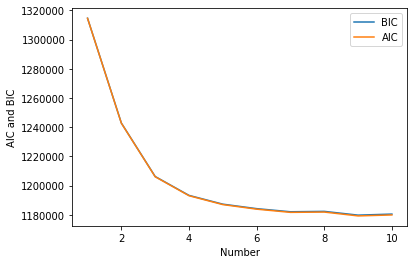

In [9]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 11) 
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalDf) for n in n_components]
plt.plot(n_components, [m.bic(principalDf) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(principalDf) for m in models], label='AIC') 
plt.legend(loc='best') 
plt.xlabel('Number')
plt.ylabel('AIC and BIC')

Text(0, 0.5, 'Second principal component')

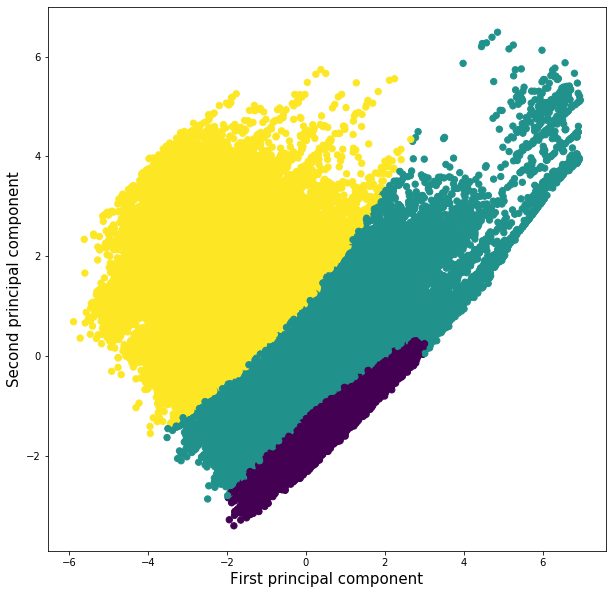

In [10]:
#GMM模型
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(principalDf)
labels = gmm.predict(principalDf)
plt.figure(figsize=(10,10))
plt.scatter(principalDf['1'],principalDf['2'], c=labels, s=40, cmap='viridis')
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second principal component', fontsize = 15)

In [11]:
labels

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [14]:
df = pd.DataFrame(labels)

In [17]:
df.to_csv('labels.csv')